# Final exam of Image Processing and analysis


In [1]:
# Import the required tools
from matplotlib import pyplot as plt
import numpy as np
import cv2

## Part 1 : Introduction

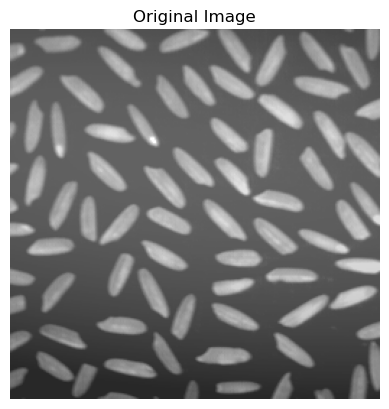

In [2]:
# Code here 
# Load the image
image_path = r"C:\Users\ASUS\Desktop\UFAZ\Image_Analysis\rice.tif" 
original_image = cv2.imread(image_path)

# Convert from BGR to RGB (OpenCV loads images in BGR format)
original_image_rgb = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

# Display the original image
plt.imshow(original_image_rgb)
plt.title("Original Image")
plt.axis("off")
plt.show()

2. Which is the format of the image. Convert it to a graylevel image if it is not

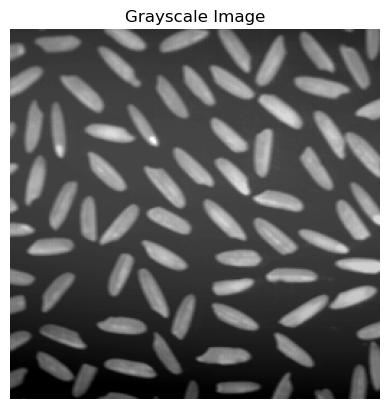

In [3]:
# Code here
# Convert the image to grayscale
gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

# Display the grayscale image
plt.imshow(gray_image, cmap='gray')
plt.title("Grayscale Image")
plt.axis("off")
plt.show()

3. Draw the histogram of the image rice

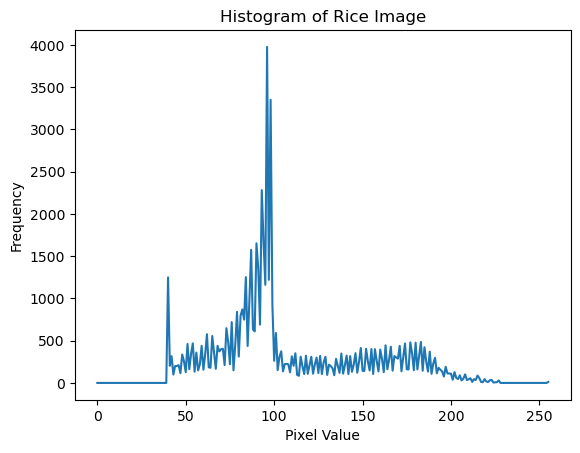

In [4]:
# Code here

# Calculate histogram
histogram = cv2.calcHist([gray_image], [0], None, [256], [0, 256])

# Plot the histogram
plt.plot(histogram)
plt.title('Histogram of Rice Image')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()

4. Folowing this histogram, how many clusters could we deduce from the image? Is it conform to the visual aspect of the image having a background and the object (rice)?


The number of clusters is not always clearly defined by the histogram, and visual inspection of the image is crucial. If the histogram shows more than two peaks or lacks a clear separation, additional analysis and image processing techniques may be needed to identify distinct clusters.

In summary, the histogram analysis can provide an initial indication, but it is important to combine it with visual inspection and potentially apply further image processing methods for a more accurate determination of clusters in the image.

## Part 2 : Image Processing

5. Consider that our image is basically not perfect, carry out histogram equalization on the image rice. What is the impact of this processing, is the image visually better?

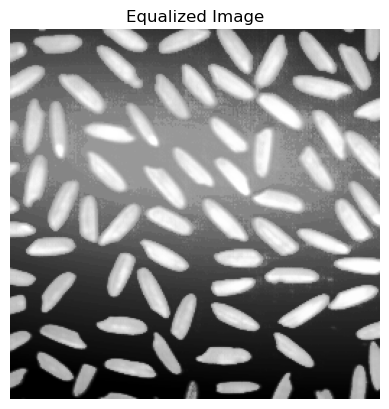

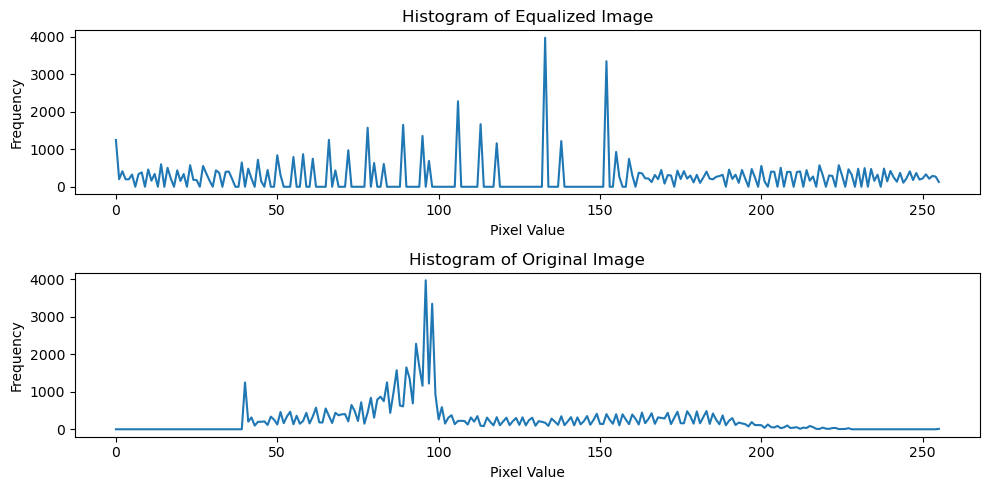

In [5]:
# Code here

# Perform histogram equalization
equalized_image = cv2.equalizeHist(gray_image)

# Display the equalized image
plt.imshow(equalized_image, cmap='gray')
plt.title("Equalized Image")
plt.axis("off")
plt.show()

# Calculate histogram for the equalized image
equalized_histogram = cv2.calcHist([equalized_image], [0], None, [256], [0, 256])

# Plot the histograms
plt.figure(figsize=(10, 5))

plt.subplot(2, 1, 1)
plt.plot(equalized_histogram)
plt.title('Histogram of Equalized Image')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.subplot(2, 1, 2)
original_histogram = cv2.calcHist([gray_image], [0], None, [256], [0, 256])
plt.plot(original_histogram)
plt.title('Histogram of Original Image')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

6. Add 2% of salt and pepper noise and display the noised image.

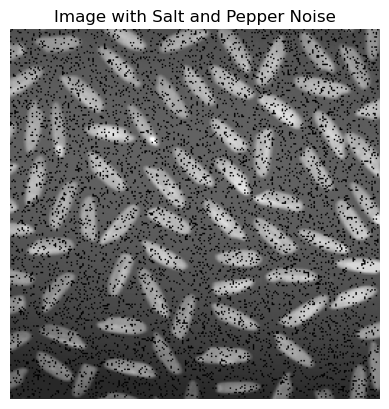

In [6]:
# Function to add salt and pepper noise
def add_salt_and_pepper_noise(image, salt_prob, pepper_prob):
    noisy_image = np.copy(image)
    total_pixels = image.size

    # Add salt noise
    salt_pixels = int(total_pixels * salt_prob)
    salt_coords = [np.random.randint(0, i - 1, salt_pixels) for i in image.shape]
    noisy_image[salt_coords[0], salt_coords[1], :] = 1

    # Add pepper noise
    pepper_pixels = int(total_pixels * pepper_prob)
    pepper_coords = [np.random.randint(0, i - 1, pepper_pixels) for i in image.shape]
    noisy_image[pepper_coords[0], pepper_coords[1], :] = 0

    return noisy_image

# Add 2% salt and pepper noise
salt_and_pepper_image = add_salt_and_pepper_noise(original_image_rgb, salt_prob=0.02, pepper_prob=0.02)

# Display the noised image
plt.imshow(salt_and_pepper_image)
plt.title("Image with Salt and Pepper Noise")
plt.axis("off")
plt.show()

7. Draw again the histogram of the noised image and evaluate again the number of clusters. What do you thing about this noise? 

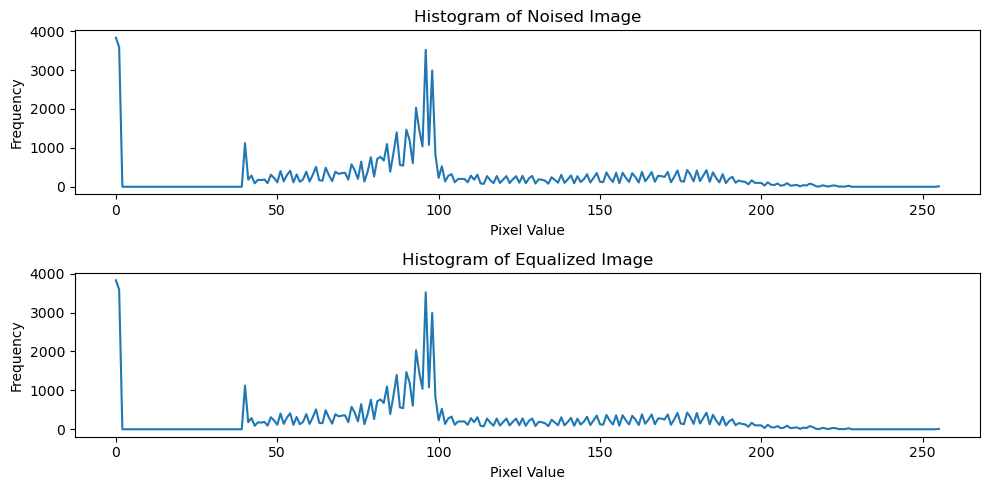

In [7]:
# Code here
# Calculate histogram for the noised image
noised_histogram = cv2.calcHist([salt_and_pepper_image], [0], None, [256], [0, 256])

# Plot the histograms
plt.figure(figsize=(10, 5))

plt.subplot(2, 1, 1)
plt.plot(noised_histogram)
plt.title('Histogram of Noised Image')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.subplot(2, 1, 2)
equalized_histogram = cv2.calcHist([salt_and_pepper_image], [0], None, [256], [0, 256])
plt.plot(equalized_histogram)
plt.title('Histogram of Equalized Image')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

8. Apply two filters to the noised image : an average filter and another one you judge convenient. Display the reslut of the two filtered images. 

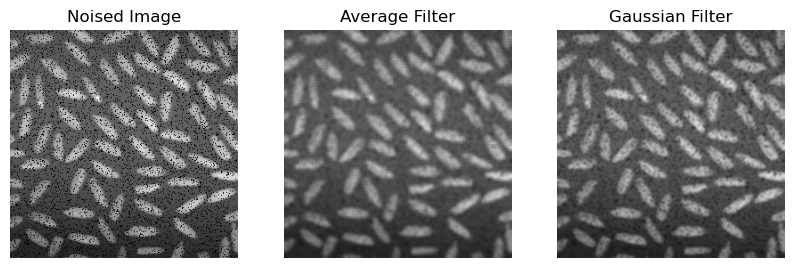

In [8]:
# Code here
# Apply an average filter
average_filter = cv2.blur(salt_and_pepper_image, (5, 5))  

# Apply a Gaussian filter
gaussian_filter = cv2.GaussianBlur(salt_and_pepper_image, (5, 5), 0)  

# Display the noised image, average-filtered image, and Gaussian-filtered image
plt.figure(figsize=(10, 7))

plt.subplot(1, 3, 1)
plt.imshow(salt_and_pepper_image, cmap='gray')
plt.title("Noised Image")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(average_filter, cmap='gray')
plt.title("Average Filter")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(gaussian_filter, cmap='gray')
plt.title("Gaussian Filter")
plt.axis("off")

plt.show()

9. Display the histograms of the two filtered images. How many clusters you can deduce from these two histograms. Which filtering is more convenient with regard to the number of clusters on the original image (background and object)? 

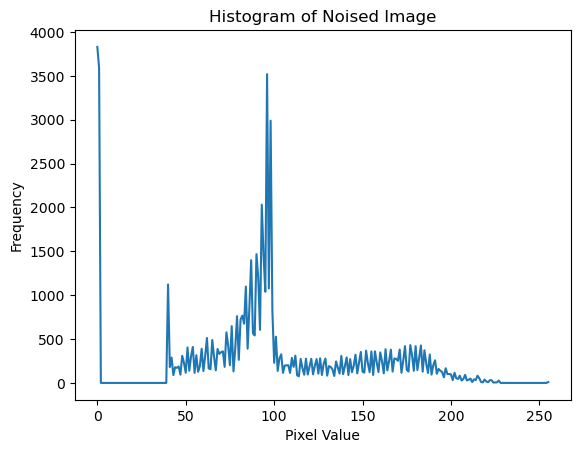

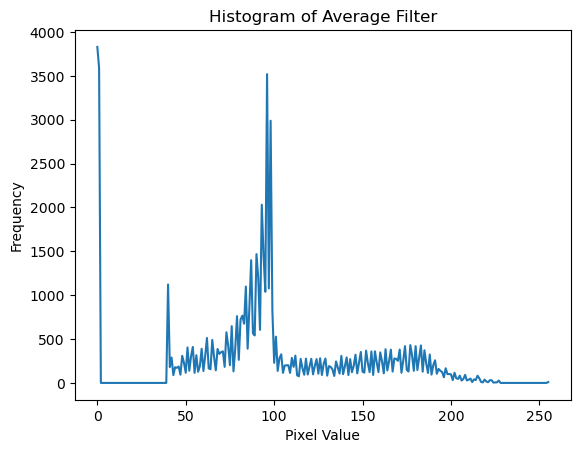

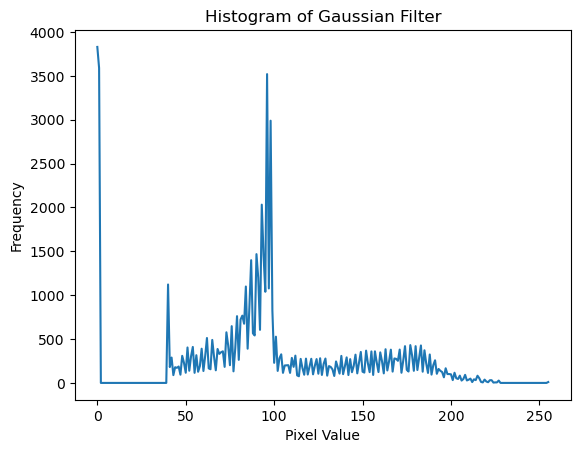

In [9]:
# Code here

# Plot histograms of the filtered images
def plot_histogram(image, title):
    histogram = cv2.calcHist([salt_and_pepper_image], [0], None, [256], [0, 256])
    plt.plot(histogram)
    plt.title(f'Histogram of {title}')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.show()

# Plot histograms for the noised image, average-filtered image, and Gaussian-filtered image
plot_histogram(salt_and_pepper_image, "Noised Image")
plot_histogram(average_filter, "Average Filter")
plot_histogram(gaussian_filter, "Gaussian Filter")

## Part 3 : The whole chain

10. Display on the same window the six images : 
- the original image, 
- the noised image, 
- the original after histogram equalization 
- the noised image after histogram equalization
- the two filterd images

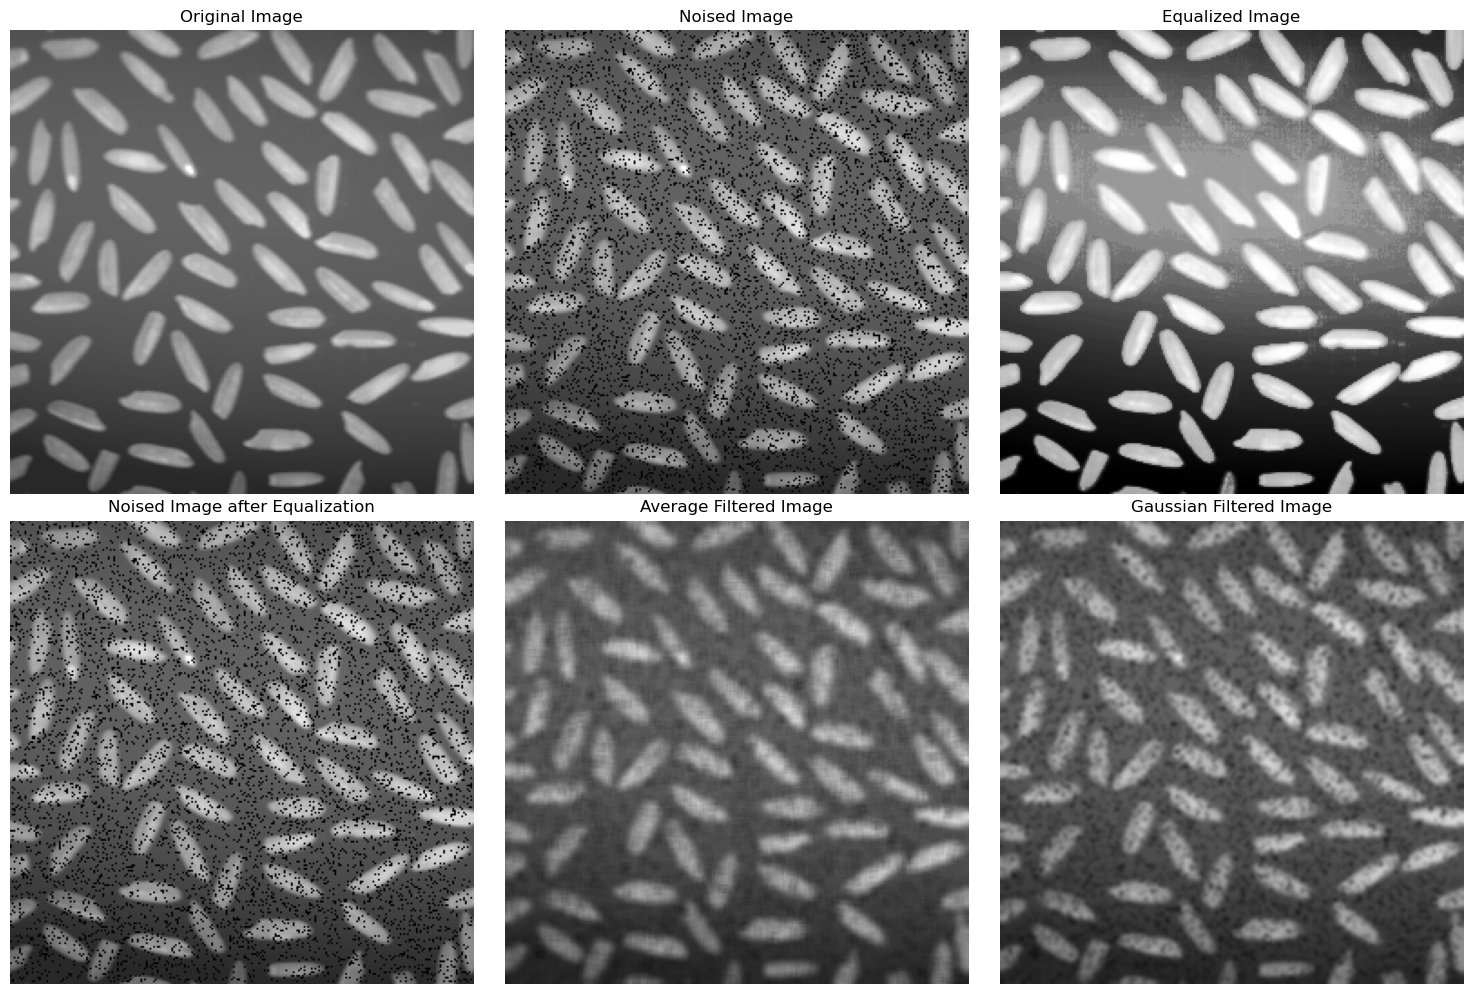

In [10]:
# Code here
# Plot all six images in a single window
plt.figure(figsize=(15, 10))

# Original Image
plt.subplot(2, 3, 1)
plt.imshow(original_image_rgb)
plt.title("Original Image")
plt.axis("off")

# Noised Image
plt.subplot(2, 3, 2)
plt.imshow(salt_and_pepper_image, cmap='gray')
plt.title("Noised Image")
plt.axis("off")

# Original after Histogram Equalization
plt.subplot(2, 3, 3)
plt.imshow(equalized_image, cmap='gray')
plt.title("Equalized Image")
plt.axis("off")

# Noised after Histogram Equalization
plt.subplot(2, 3, 4)
plt.imshow(salt_and_pepper_image, cmap='gray')
plt.title("Noised Image after Equalization")
plt.axis("off")

# Average Filtered Image
plt.subplot(2, 3, 5)
plt.imshow(average_filter, cmap='gray')
plt.title("Average Filtered Image")
plt.axis("off")

# Gaussian Filtered Image
plt.subplot(2, 3, 6)
plt.imshow(gaussian_filter, cmap='gray')
plt.title("Gaussian Filtered Image")
plt.axis("off")

plt.tight_layout()
plt.show()

11. Analyse qualitatively the impact of the different processing. Wich one is more convenient, histogram enhancement or filtering? 

"Answer here"

Qualitatively analyzing the impact of different processing steps on the images can provide insights into their effectiveness. 

### Original Image:

This is the starting point for comparison.
### Noised Image:

The addition of salt-and-pepper noise introduces random black and white pixels, disrupting the image's quality and making details harder to discern.
### Histogram Equalization on Noised Image:

Histogram equalization aims to improve the contrast of the image by redistributing pixel intensities. In the case of the noised image, it might enhance the visibility of details but could also amplify the impact of noise.
### Average Filter on Noised Image:

The average filter is a simple smoothing filter that can reduce the impact of salt-and-pepper noise. It helps to blur the sharp transitions caused by the noise, but it may also result in loss of finer details.
### Gaussian Filter on Noised Image:

The Gaussian filter is effective for reducing noise while preserving edges better than the average filter. It provides a smoother result and helps in maintaining more details.
Qualitative Analysis:

### Histogram Equalization vs. Filtering:

Histogram equalization can enhance contrast but might also amplify noise.
Filtering techniques (e.g., average and Gaussian) specifically address noise reduction and smoothing.
Filtering Impact:

Both the average and Gaussian filters help in reducing salt-and-pepper noise.
The choice between them depends on the desired level of smoothing and detail preservation.
Which one is more convenient?

The convenience of histogram equalization versus filtering depends on the specific goals of your image processing task:
If the primary concern is enhancing overall contrast, histogram equalization might be suitable.
If the goal is noise reduction and preserving image details, filtering (e.g., Gaussian filtering) is more appropriate.
In your case, considering the presence of noise (salt-and-pepper noise), the use of filtering techniques, particularly the Gaussian filter, seems more convenient for improving image quality and preserving details while reducing noise. However, the choice depends on the specific requirements of your application. It's also worth experimenting with different parameters (e.g., kernel sizes for filters) to find the most suitable configuration for your needs.

12. Carry out edge detection on the 6 previous images and display the results again on the same window.

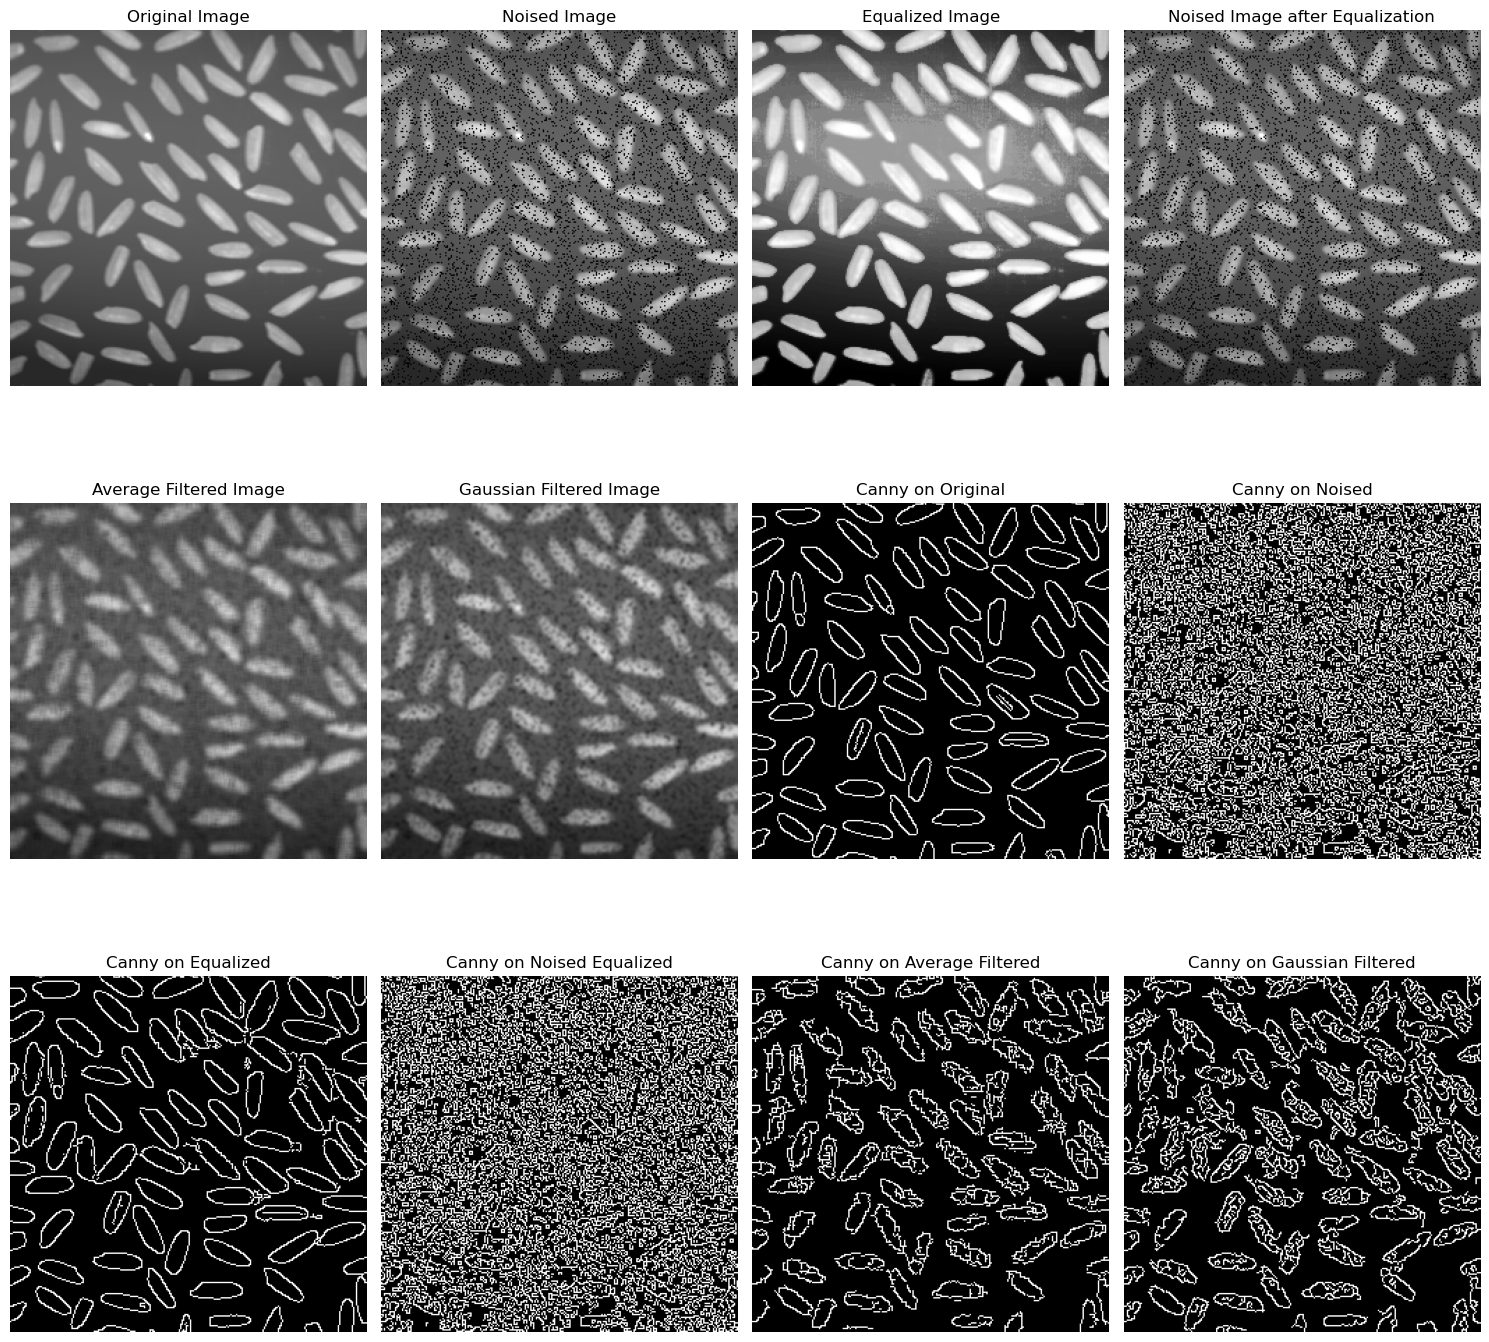

In [11]:
# Code here
# Perform edge detection using Canny
canny_original = cv2.Canny(original_image, 50, 150)
canny_noised = cv2.Canny(salt_and_pepper_image, 50, 150)
canny_equalized = cv2.Canny(equalized_image, 50, 150)
canny_noised_equalized = cv2.Canny(salt_and_pepper_image, 50, 150)
canny_average_filter = cv2.Canny(average_filter, 50, 150)
canny_gaussian_filter = cv2.Canny(gaussian_filter, 50, 150)

# Plot all twelve images in a single window
plt.figure(figsize=(15, 15))

# Original Image
plt.subplot(3, 4, 1)
plt.imshow(original_image_rgb)
plt.title("Original Image")
plt.axis("off")

# Noised Image
plt.subplot(3, 4, 2)
plt.imshow(salt_and_pepper_image, cmap='gray')
plt.title("Noised Image")
plt.axis("off")

# Original after Histogram Equalization
plt.subplot(3, 4, 3)
plt.imshow(equalized_image, cmap='gray')
plt.title("Equalized Image")
plt.axis("off")

# Noised after Histogram Equalization
plt.subplot(3, 4, 4)
plt.imshow(salt_and_pepper_image, cmap='gray')
plt.title("Noised Image after Equalization")
plt.axis("off")

# Average Filtered Image
plt.subplot(3, 4, 5)
plt.imshow(average_filter, cmap='gray')
plt.title("Average Filtered Image")
plt.axis("off")

# Gaussian Filtered Image
plt.subplot(3, 4, 6)
plt.imshow(gaussian_filter, cmap='gray')
plt.title("Gaussian Filtered Image")
plt.axis("off")

# Canny on Original
plt.subplot(3, 4, 7)
plt.imshow(canny_original, cmap='gray')
plt.title("Canny on Original")
plt.axis("off")

# Canny on Noised
plt.subplot(3, 4, 8)
plt.imshow(canny_noised, cmap='gray')
plt.title("Canny on Noised")
plt.axis("off")

# Canny on Equalized
plt.subplot(3, 4, 9)
plt.imshow(canny_equalized, cmap='gray')
plt.title("Canny on Equalized")
plt.axis("off")

# Canny on Noised Equalized
plt.subplot(3, 4, 10)
plt.imshow(canny_noised_equalized, cmap='gray')
plt.title("Canny on Noised Equalized")
plt.axis("off")

# Canny on Average Filtered
plt.subplot(3, 4, 11)
plt.imshow(canny_average_filter, cmap='gray')
plt.title("Canny on Average Filtered")
plt.axis("off")

# Canny on Gaussian Filtered
plt.subplot(3, 4, 12)
plt.imshow(canny_gaussian_filter, cmap='gray')
plt.title("Canny on Gaussian Filtered")
plt.axis("off")

plt.tight_layout()
plt.show()

13. Hold on (superimpose) each detected edges on the original image. Display the six superpositions in red in the same window. Is this result conform to the visual anlysis of question 11? 


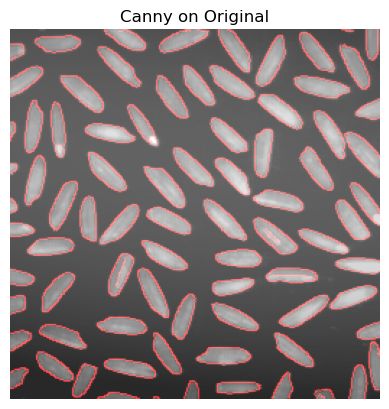

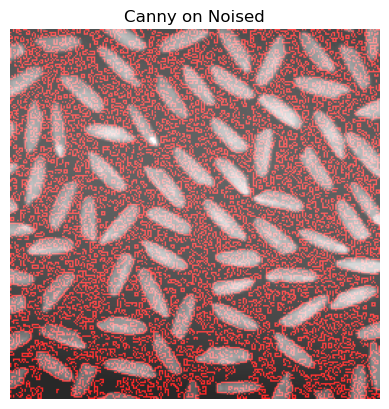

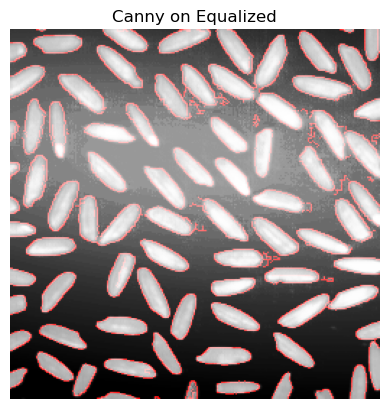

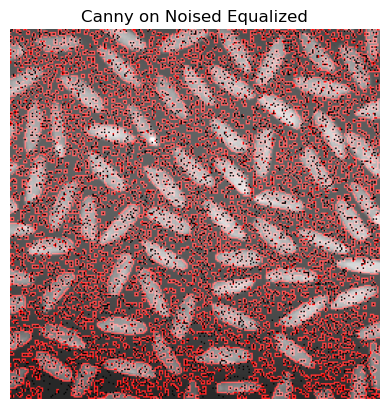

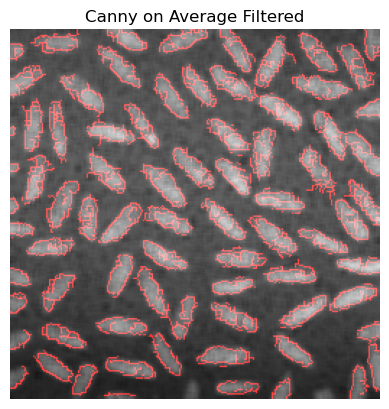

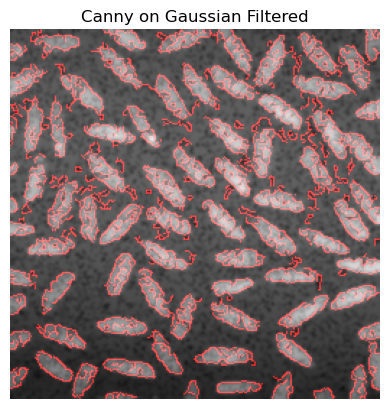

In [12]:
#Code here
# Function to superimpose edges on the original image
def superimpose_edges(original, edges, title):
    # Resize edges to match the original image size
    edges_resized = cv2.resize(edges, (original.shape[1], original.shape[0]))

    # Create a mask for the edges
    mask = edges_resized != 0

    # Convert the original image to RGB
    original_rgb = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)

    original_rgb[mask, 0] = 255

    plt.imshow(original_rgb)
    plt.title(title)
    plt.axis("off")
    plt.show()

# Superimpose edges on the original images
superimpose_edges(original_image, canny_original, "Canny on Original")
superimpose_edges(original_image, canny_noised, "Canny on Noised")
superimpose_edges(equalized_image, canny_equalized, "Canny on Equalized")
superimpose_edges(salt_and_pepper_image, canny_noised_equalized, "Canny on Noised Equalized")
superimpose_edges(average_filter, canny_average_filter, "Canny on Average Filtered")
superimpose_edges(gaussian_filter, canny_gaussian_filter, "Canny on Gaussian Filtered")

NB : Send me the pdf, HTML and ipynb files. The name of the file should contain you name.